# 11 Insurance Draft

# Introduction

Travel insurance is a type of insurance policy that provides coverage for a range of unexpected events that can occur during a trip, such as medical emergencies, trip cancellations or interruptions, lost or stolen luggage, and other mishaps that can result in financial loss. Travel insurance can help travelers feel more secure and protected while traveling by providing financial compensation for unexpected expenses or losses. Depending on the policy, coverage can include medical expenses, emergency evacuation, trip cancellation or interruption, lost or stolen baggage, and other travel-related incidents. 

Travel insurance provides benefits to travelers by giving them peace of mind and protection against unexpected events that may occur while traveling. By promoting the benefits of travel insurance, insurers can encourage travelers to purchase policies and reduce their financial risk while traveling.

Travel insurance policies can generate significant revenue for insurers by charging premiums based on the level of coverage and the length of the trip. The insurance company assumes the risk of potential losses that the policyholder may incur during their trip, and in exchange, the policyholder pays a premium for that coverage.

In this project, I will analyze the data from nearly 2000 previous customers of a travel insurance company, which contains certain features regarding each customer and indicates it the customer bought travel insurance. 

# Goal

The purpose of this project is to create a model to predict if a future customer will buy travel insurance with an accuracy score of 75% or higher.

# Technical Requirements

1. Download the data from Travel Insurance Prediction Data.
2. Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
3. Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
4. Apply various machine learning models to predict the TravelInsurance column using the other features. This should include hyperparameter tuning, model ensembling, the analysis of model selection, and other methods.
5. Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
6. Provide suggestions about how your analysis can be improved.

# Standards

> **Standard 1:** The standard for an acceptable accuracy score is 75%.<BR>
> **Standard 2:** The significance level (alpha) for all hypothesis tests is 0.05.

# Biases

I did not identify big biases in this data set, except that some of the data lacks informative detail. For example, the data provides only general information about employment, namely if the person is a government worker or works in the private sector. These categories are too broad. It's hard to say, if this is a bias on the part of the data collectors or an inability to collect more detailed information. 

# Domain Knowledge

I have no experience in the travel or insurance industry. There may be parts of the data that I have overlooked that may have been most important and I may have given importance to parts of the data that may have had little significance. 

# Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix# Display Parameters
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif



import warnings
import shap
import optuna
import logging
import tqdm

warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Display Parameters

## Display Features

In [3]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

## Colors

In [4]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## Figure Parameters

In [5]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Data Overview and Preprocessing

In [6]:
insurance = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Insurance\\DataSet\\Insurance.csv",
    index_col=0,
)

In [7]:
insurance = insurance.rename(
    columns={
        "Employment Type": "EmploymentType",
        "GraduateOrNot": "Graduate",
        "EverTravelledAbroad": "TravelledAbroad",
    }
)

In [8]:
insurance.head()

,Age,EmploymentType,Graduate,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,TravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Number of Rows

In [58]:
insurance.shape[0]

1987

## Features

1. **Age:** Age of the customer
2. **Employment Type:** The sector in which customer is employed
3. **Graduate:** whether the customer is college graduate
4. **AnnualIncome:** The yearly income of the customer in Indian Rupee, rounded to the nearest fifty-thousand Rupees.
5. **FamilyMembers:** Number of members in customer's family
6. **ChronicDisease:** Whether the customer suffers from any major disease or conditions like diabetes/high bp or asthama,etc.
7. **FrequentFlyer:** Derived data based on customer's history of booking air tickets on at least 4 different instances in the last between 2017 and 2019.
8. **TravelledAbroad:** Has the customer ever travelled to a foreign country (not necessarily using the company's services).
9. **TravelInsurance:** Did the customer buy travel insurance package during introductory offering held in the year 2019.

In [59]:
insurance.count()

Age                1987
EmploymentType     1987
Graduate           1987
AnnualIncome       1987
FamilyMembers      1987
ChronicDiseases    1987
FrequentFlyer      1987
TravelledAbroad    1987
TravelInsurance    1987
dtype: int64

## Missing Data

In [60]:
insurance.isnull().sum(axis=0)

Age                0
EmploymentType     0
Graduate           0
AnnualIncome       0
FamilyMembers      0
ChronicDiseases    0
FrequentFlyer      0
TravelledAbroad    0
TravelInsurance    0
dtype: int64

## Data Types

In [61]:
insurance.dtypes

Age                 int64
EmploymentType     object
Graduate           object
AnnualIncome        int64
FamilyMembers       int64
ChronicDiseases     int64
FrequentFlyer      object
TravelledAbroad    object
TravelInsurance     int64
dtype: object

## Age Distribution

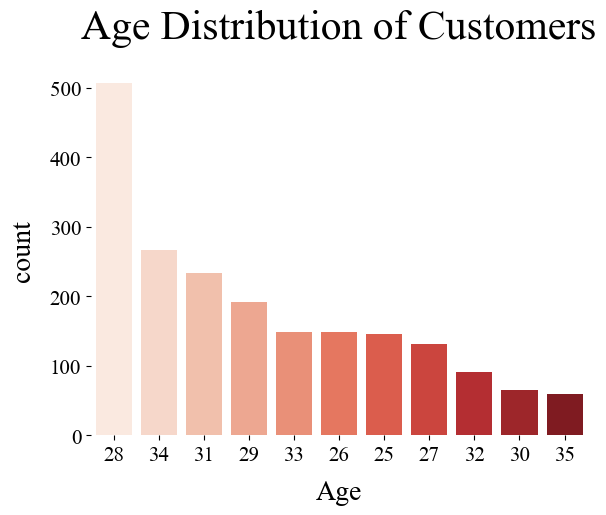

In [62]:
plt.rcParams.update(params)

sns.countplot(
    x="Age",
    data=insurance,
    palette="Reds",
    order=insurance["Age"].value_counts().index,
)

plt.title("Age Distribution of Customers");

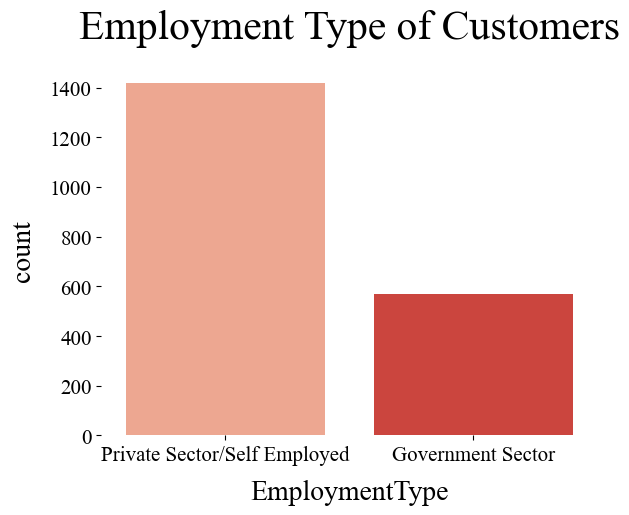

In [65]:
plt.rcParams.update(params)

sns.countplot(
    x="EmploymentType",
    data=insurance,
    palette="Reds",
    order=insurance["EmploymentType"].value_counts().index,
)

plt.title("Employment Type of Customers");

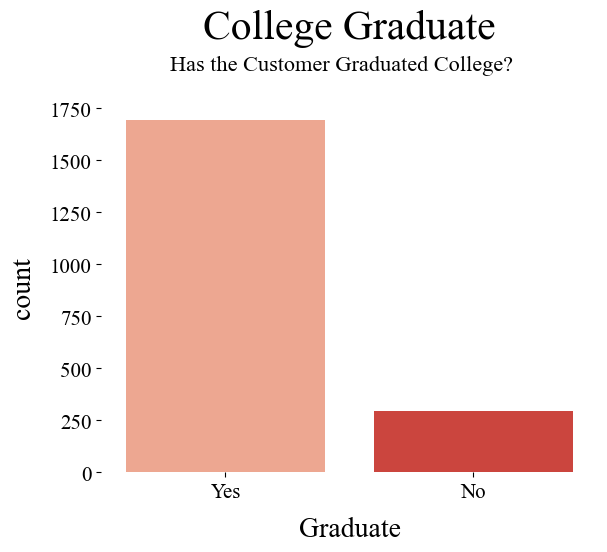

In [91]:
plt.rcParams.update(params)

sns.countplot(
    x="Graduate",
    data=insurance,
    palette="Reds",
    order=insurance["Graduate"].value_counts().index,
)

plt.title("College Graduate", y=1.10)
plt.suptitle("Has the Customer Graduated from College?", fontsize=16);

# Hypothesis Test: College Graduates 

**Null**: There is no significant difference between the proportion of college graduates who bought travel insurance compared to non-graduates.<BR>
**Alternative**: A higher proportion of college graduates purchased travel insurance compared to non-graduates. 

In [36]:
grad_yes = insurance.loc[insurance['Graduate'] == 'Yes']
graduate_yes_insurance_yes = (grad_yes['TravelInsurance'] == 1).sum()
count_graduate_yes = (insurance['Graduate'] == 'Yes').sum()
prop_graduate_yes = graduate_yes_insurance_yes / count_graduate_yes
print(f"Proportion of graduate customers who bought travel insurance: {prop_graduate_yes:.2f}")

Proportion of graduate customers who bought travel insurance: 0.36


In [37]:
grad_no = insurance.loc[insurance['Graduate'] == 'No']
graduate_no_insurance_yes = (grad_no['TravelInsurance'] == 1).sum()
count_graduate_no = (insurance['Graduate'] == 'No').sum()
prop_graduate_no = graduate_no_insurance_yes / count_graduate_no
print(f"Proportion of non-graduate customers who bought travel insurance: {prop_graduate_no:.2f}")

Proportion of non-graduate customers who bought travel insurance: 0.34


In [38]:
from statsmodels.stats.proportion import proportions_ztest

numerator = np.array([graduate_yes_insurance_yes, graduate_no_insurance_yes])
denominator = np.array([count_graduate_yes, count_graduate_no])

stat, pval = proportions_ztest(numerator, denominator, alternative='two-sided')
print(f"Z-statistic: {stat:.2f}")
print(f"P-value: {pval:.2f}")

Z-statistic: 0.84
P-value: 0.40


### Section Summary
> * I conducted a proportions z-test to test this hypothesis. 
> * The p-value obtained is much greater than the significance level of 0.05. 
> * Therefore, we fail to reject the null hypothesis and we can conclude that there is not enough evidence to support a significant difference in proportions. 

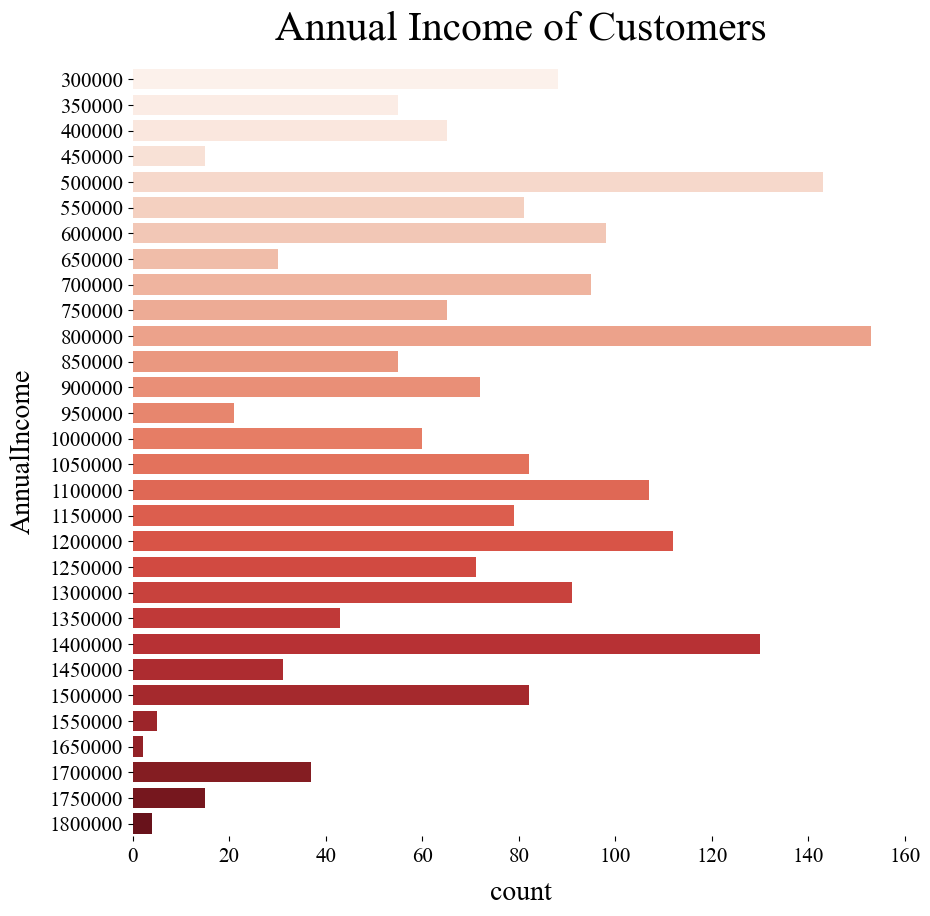

In [67]:
plt.rcParams.update(params)

plt.figure(figsize=(10, 10))
sns.countplot(y="AnnualIncome", data=insurance, palette="Reds")

plt.title("Annual Income of Customers");

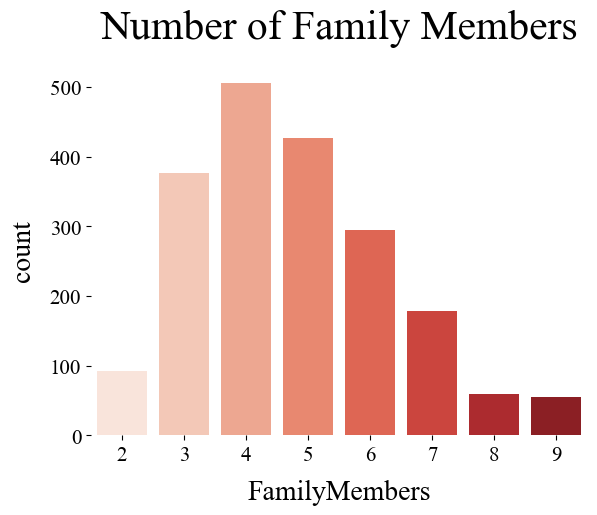

In [111]:
plt.rcParams.update(params)

sns.countplot(x="FamilyMembers", data=insurance, palette="Reds")

plt.title("Number of Family Members of Customers");

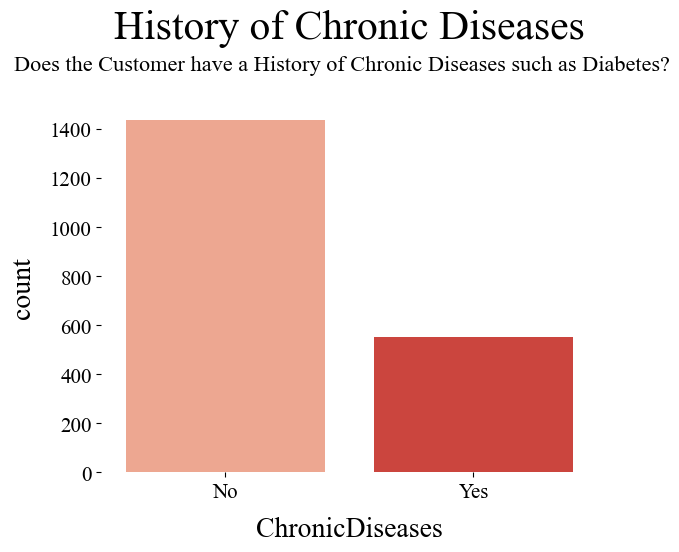

In [112]:
plt.rcParams.update(params)

sns.countplot(x="ChronicDiseases", data=insurance, palette="Reds")

custom_labels = ["No", "Yes"]
plt.xticks(range(len(custom_labels)), custom_labels)

plt.title("History of Chronic Diseases", y=1.10)
plt.suptitle("Does the Customer have a History of Chronic Diseases such as Diabetes?", fontsize=16);

# Hypothesis Test: History of Chronic Diseases

**Null**: There is no significant difference between the proportion of customers with a history of chronic diseases who bought travel insurance compared to customers without such a history.<BR>
**Alternative**: A higher proportion of customers with a history of chronic diseases purchased travel insurance compared to customers without a history of chronic diseases. 

In [39]:
disease_yes = insurance.loc[insurance['ChronicDiseases'] == 1]
disease_yes_insurance_yes = (disease_yes['TravelInsurance'] == 1).sum()
count_disease_yes = (insurance['ChronicDiseases'] == 1).sum()
prop_disease_yes = disease_yes_insurance_yes / count_disease_yes
print(f"Proportion of customers with chronic diseases who bought travel insurance: {prop_disease_yes:.2f}")

Proportion of customers with chronic diseases who bought travel insurance: 0.37


In [40]:
disease_no = insurance.loc[insurance['ChronicDiseases'] == 0]
disease_no_insurance_yes = (disease_no['TravelInsurance'] == 1).sum()
count_disease_no = (insurance['ChronicDiseases'] == 0).sum()
prop_disease_no = disease_no_insurance_yes / count_disease_no
print(f"Proportion of customers without chronic diseases who bought travel insurance: {prop_disease_no:.2f}")

Proportion of customers without chronic diseases who bought travel insurance: 0.35


In [41]:
from statsmodels.stats.proportion import proportions_ztest

numerator = np.array([disease_yes_insurance_yes, disease_no_insurance_yes])
denominator = np.array([count_disease_yes, count_disease_no])

stat, pval = proportions_ztest(numerator, denominator, alternative='two-sided')
print(f"Z-statistic: {stat:.2f}")
print(f"P-value: {pval:.2f}")

Z-statistic: 0.81
P-value: 0.42


### Section Summary
> * I conducted a proportions z-test to test this hypothesis. 
> * The p-value is much greater than the significance level of 0.05. 
> * Therefore, we fail to reject the null hypothesis and can conclude that there is not enough evidence to support a significant difference in proportions. 

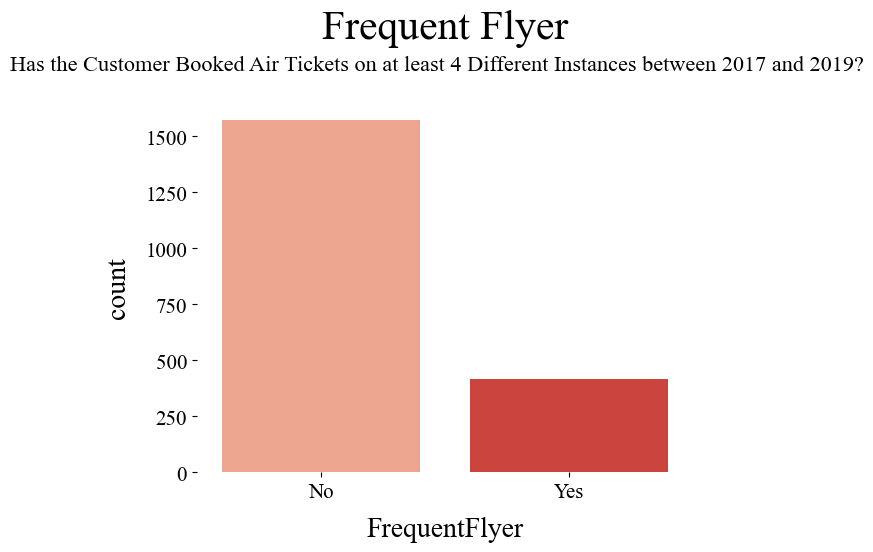

In [113]:
plt.rcParams.update(params)

sns.countplot(x="FrequentFlyer", data=insurance, palette="Reds")

custom_labels = ["No", "Yes"]
plt.xticks(range(len(custom_labels)), custom_labels)

plt.title("Frequent Flyer", y=1.10)
plt.suptitle("Has the Customer Booked Air Tickets on at least 4 Different Instances between 2017 and 2019?", fontsize=16);

# Hypothesis Test: Frequent Flyers

**Null**: There is no significant difference between the proportion of frequent-flyer customers who bought travel insurance compared to customers who are not frequent flyers.<BR>
**Alternative**: A higher proportion of customers who are frequent flyers purchased travel insurance compared to customers who are not frequent flyers. 

In [ ]:
disease_yes = insurance.loc[insurance['ChronicDiseases'] == 1]
disease_yes_insurance_yes = (disease_yes['TravelInsurance'] == 1).sum()
count_disease_yes = (insurance['ChronicDiseases'] == 1).sum()
prop_disease_yes = disease_yes_insurance_yes / count_disease_yes
print(f"Proportion of customers with chronic diseases who bought travel insurance: {prop_disease_yes:.2f}")

In [42]:
frequent_yes = insurance.loc[insurance['FrequentFlyer'] == 'Yes']
frequent_yes_insurance_yes = (frequent_yes['TravelInsurance'] == 1).sum()
count_frequent_yes = (insurance['FrequentFlyer'] == "Yes").sum()
prop_frequent_yes = frequent_yes_insurance_yes / count_frequent_yes
print(f"Proportion of frequent-flyer customers who bought travel insurance: {prop_frequent_yes:.2f}")

Proportion of frequent-flyer customers who bought travel insurance: 0.57


In [43]:
frequent_no = insurance.loc[insurance['FrequentFlyer'] == 'No']
frequent_no_insurance_yes = (frequent_no['TravelInsurance'] == 1).sum()
count_frequent_no = (insurance['FrequentFlyer'] == "No").sum()
prop_frequent_no = frequent_no_insurance_yes / count_frequent_no
print(f"Proportion of non-frequent-flyer customers who bought travel insurance: {prop_frequent_yes:.2f}")

Proportion of non-frequent-flyer customers who bought travel insurance: 0.57


In [23]:
from statsmodels.stats.proportion import proportions_ztest

numerator = np.array([count_disease_yesinsurance, count_disease_noinsurance])
denominator = np.array([count_disease_yes, count_disease_no])

stat, pval = proportions_ztest(numerator, denominator, alternative='two-sided')
print(f"Z-statistic: {stat:.2f}")
print(f"P-value: {pval:.2f}")

Z-statistic: 5.78
P-value: 0.00


### Section Summary
> * I conducted a proportions z-test to test this hypothesis. 
> * The p-value of 0.00 is much smaller than the significance level of 0.05. 
> * Therefore, we reject the null hypothesis and can conclude that there is enough evidence to support a significant difference in proportions. 

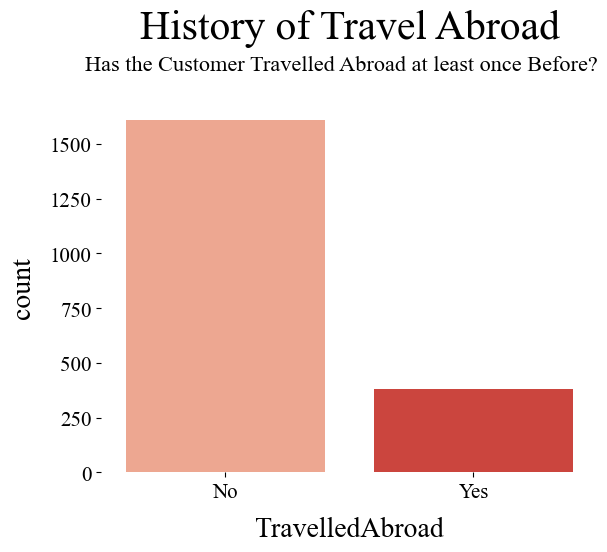

In [114]:
plt.rcParams.update(params)

sns.countplot(x="TravelledAbroad", data=insurance, palette="Reds")

custom_labels = ["No", "Yes"]
plt.xticks(range(len(custom_labels)), custom_labels)

plt.title("History of Travel Abroad", y=1.10)
plt.suptitle("Has the Customer Travelled Abroad at least Once Before?", fontsize=16);

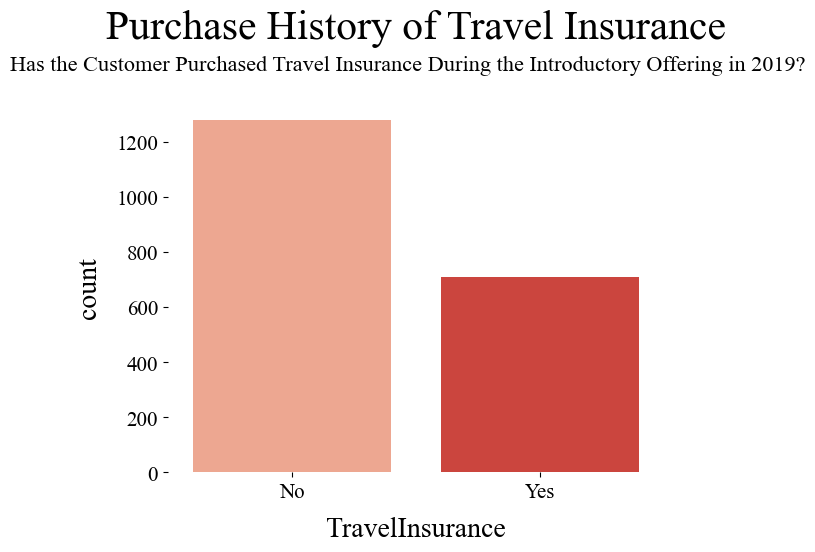

In [115]:
plt.rcParams.update(params)

sns.countplot(
    x="TravelInsurance",
    data=insurance,
    palette="Reds",
    order=insurance["TravelInsurance"].value_counts().index,
)

custom_labels = ["No", "Yes"]
plt.xticks(range(len(custom_labels)), custom_labels)

plt.title("Purchase History of Travel Insurance", y=1.10)
plt.suptitle("Has the Customer Purchased Travel Insurance During the Introductory Offering in 2019?", fontsize=16);

# Correlations

## Correlation between each Feature and the Travel Insurance Feature

In [144]:
corr_matrix = insurance.corr(numeric_only=True)
corr_matrix["TravelInsurance"].sort_values(ascending=False)

TravelInsurance    1.000000
TravelledAbroad    0.433183
AnnualIncome       0.396763
FrequentFlyer      0.232103
EmploymentType     0.147847
FamilyMembers      0.079909
Age                0.061060
Graduate           0.018934
ChronicDiseases    0.018190
Name: TravelInsurance, dtype: float64

## Correlations between Features

In [116]:
def create_heatmap(data, title):
    """
    Creates a Seaborn heatmap.
    """

    plt.rcParams.update(params)
    corr = data.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(8, 8))

    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    heatmap = sns.heatmap(
        corr,
        mask=mask,
        vmax=1,
        vmin=-1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        annot=True,
        cmap=plt.cm.Reds
    )

    heatmap.set_title(
        title,
        fontdict={"fontsize": size},
        pad=12,
    )
    plt.xlabel("")
    plt.ylabel("")

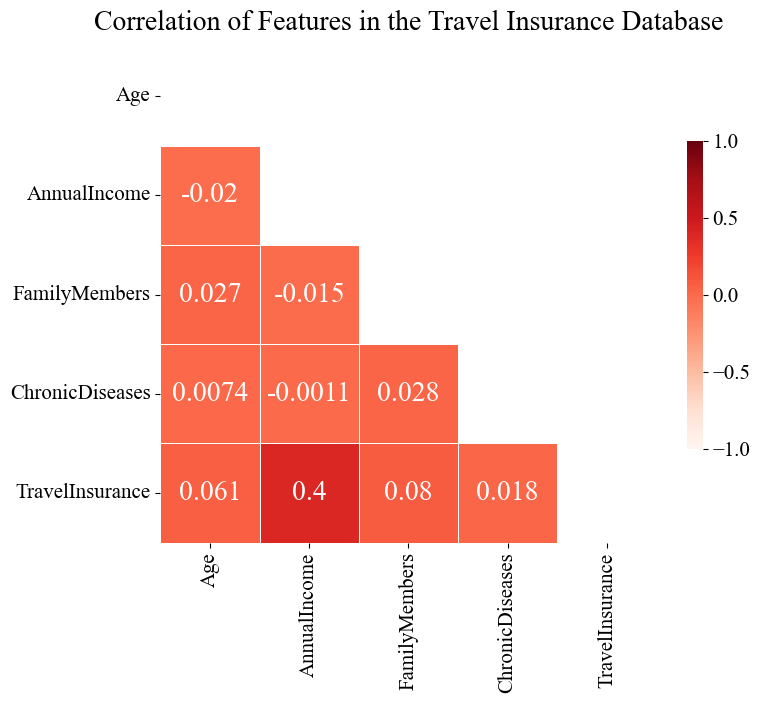

In [117]:
title = "Correlation of Features"
create_heatmap(insurance, title)

# Machine Learning

In [9]:
label_encoder = LabelEncoder()
obj = insurance.dtypes == "object"

for col in list(obj[obj].index):
    insurance[col] = label_encoder.fit_transform(insurance[col])

In [21]:
X = insurance.drop("TravelInsurance", axis=1)
y = insurance["TravelInsurance"]
X, y = shuffle(X, y, random_state=None)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# K-Fold Cross Validation

In [11]:
logisticregression_pipeline = Pipeline([
    ('lr', LogisticRegression())
])

decisiontree_pipeline = Pipeline([
    ('dt', DecisionTreeClassifier())
])

knn_pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])


pipelines = {
    'Logistic Regression': logisticregression_pipeline,
    'Decision Tree': decisiontree_pipeline,
    'KNN': knn_pipeline
}


for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=10)
    print(f'{name}: {scores.mean():.2f}')

Logistic Regression: 0.64
Decision Tree: 0.78
KNN: 0.81


# SHAP Explainer

100%|████████████████████████████████████████████████████████████████████████████████| 398/398 [00:05<00:00, 68.52it/s]


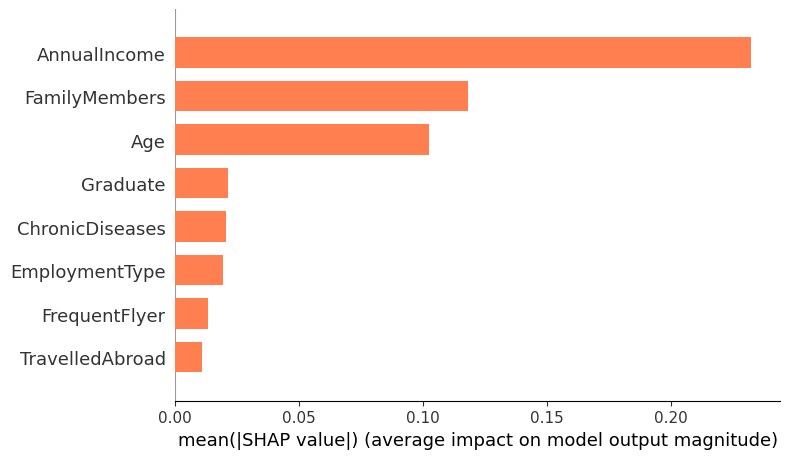

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

sampled_X = shap.sample(X, 10)

explainer = shap.KernelExplainer(dtc.predict_proba, sampled_X)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[0], X_test, plot_type="bar", color=color_11)

In [28]:
X = insurance[["AnnualIncome", "Age", "FamilyMembers"]]
y = insurance["TravelInsurance"]
X, y = shuffle(X, y, random_state=None)

In [29]:
dtc_shap = DecisionTreeClassifier()

scores = cross_val_score(knn_shap, X, y)
mean_score = scores.mean()

In [30]:
mean_score

0.7674835132843058

# Backward Elimination

In [45]:
selector = SelectKBest(score_func=f_classif, k=3)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

logisticregression_pipeline = Pipeline([
    ('lr', LogisticRegression())
])

logisticregression_pipeline.fit(X_train_reduced, y_train)


decisiontree_pipeline = Pipeline([
    ('dt', DecisionTreeClassifier())
])

decisiontree_pipeline.fit(X_train_reduced, y_train)


knn_pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

knn_pipeline.fit(X_train_reduced, y_train)


pipelines = {
    'Logistic Regression': logisticregression_pipeline,
    'Decision Tree': decisiontree_pipeline,
    'KNN': knn_pipeline
}


for name, pipeline in pipelines.items():
    score = pipeline.score(X_test_reduced, y_test)
    print(f'Test accuracy {name}: {score:.2f}')
    selected_indices = selector.get_support(indices=True)
    print(f'Selected feature indices: {selected_indices}', end="\n\n")

Test accuracy Logistic Regression: 0.64
Selected feature indices: [3 6 7]

Test accuracy Decision Tree: 0.77
Selected feature indices: [3 6 7]

Test accuracy KNN: 0.71
Selected feature indices: [3 6 7]



# Logistic Regression with Optuna

In [36]:
def logisticregression_optuna_objective(trial):

    penalty = trial.suggest_categorical("penalty", ["none", "l2"])
    C = trial.suggest_loguniform("C", 1e-5, 10)
    solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "sag", "saga"])

    model = LogisticRegression(penalty=penalty, C=C, solver=solver)

    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [37]:
logisticregression_study = optuna.create_study(direction="maximize")
logisticregression_study.optimize(logisticregression_optuna_objective, n_trials=100)

In [38]:
best_params = logisticregression_study.best_params
print(f"Best Accuracy Score: {logisticregression_study.best_value:.5f}")
print("Best hyperparameters:", best_params)

Best Accuracy Score: 0.78141
Best hyperparameters: {'penalty': 'l2', 'C': 0.017132247300763133, 'solver': 'newton-cg'}


In [39]:
logisticregression_optuna = LogisticRegression(**best_params)
logisticregression_optuna.fit(X_train, y_train);

LogisticRegression(C=0.017132247300763133, solver='newton-cg')

In [40]:
y_predict = logisticregression_optuna.predict(X_test)

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       246
           1       0.86      0.51      0.64       152

    accuracy                           0.78       398
   macro avg       0.81      0.73      0.74       398
weighted avg       0.80      0.78      0.77       398



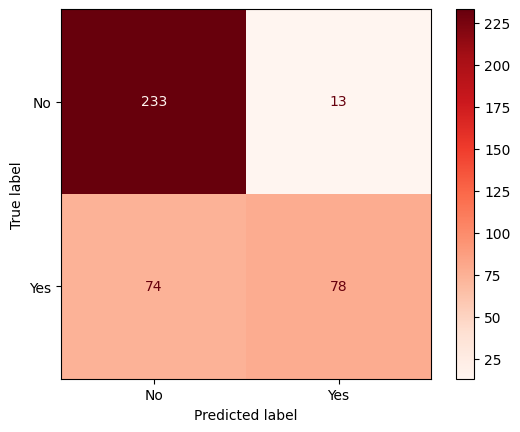

In [42]:
plot_confusion_matrix(logisticregression_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# Decision Tree with Optuna

In [44]:
def decisiontree_optuna_objective(trial):

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    splitter = trial.suggest_categorical("splitter", ["best", "random"])
    max_depth = trial.suggest_int("max_depth", 1, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0,
    )
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [45]:
decisiontree_study = optuna.create_study(direction="maximize")
decisiontree_study.optimize(decisiontree_optuna_objective, n_trials=100)

In [46]:
print(f"Best Accuracy Score: {decisiontree_study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in decisiontree_study.best_params.items():
    print(f"\t{key}: {value}")

Best Accuracy Score: 0.82412
Best hyperparameters:
	criterion: gini
	splitter: best
	max_depth: 3
	min_samples_split: 4
	min_samples_leaf: 2


In [47]:
decisiontree_best_params = decisiontree_study.best_params

decisiontree_optuna = DecisionTreeClassifier(
    criterion=decisiontree_best_params["criterion"],
    splitter=decisiontree_best_params["splitter"],
    max_depth=decisiontree_best_params["max_depth"],
    min_samples_split=decisiontree_best_params["min_samples_split"],
    min_samples_leaf=decisiontree_best_params["min_samples_leaf"],
    random_state=0,
)
decisiontree_optuna.fit(X_train, y_train);

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [48]:
y_predict = decisiontree_optuna.predict(X_test)

In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       246
           1       0.97      0.56      0.71       152

    accuracy                           0.82       398
   macro avg       0.87      0.77      0.79       398
weighted avg       0.85      0.82      0.81       398



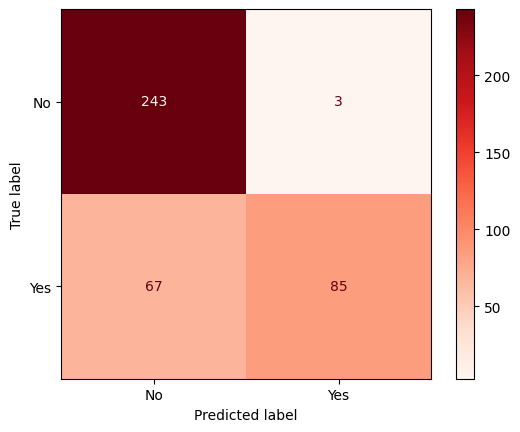

In [50]:
plot_confusion_matrix(decisiontree_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# KNN with Optuna

In [51]:
def knn_optuna_objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 3, 20)
    p = trial.suggest_int("p", 1, 2)

    model = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [52]:
knn_study = optuna.create_study(direction="maximize")
knn_study.optimize(knn_optuna_objective, n_trials=100)

In [53]:
print(f"Best accuracy score: {knn_study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in knn_study.best_params.items():
    print(f"\t{key}: {value}")

Best accuracy score: 0.81156
Best hyperparameters:
	n_neighbors: 5
	p: 2


In [54]:
knn_best_params = knn_study.best_params
knn_optuna = KNeighborsClassifier(
    n_neighbors=knn_best_params["n_neighbors"], p=knn_best_params["p"]
)
knn_optuna.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_predict = knn_optuna.predict(X_test)

In [56]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       246
           1       0.91      0.57      0.70       152

    accuracy                           0.81       398
   macro avg       0.84      0.76      0.78       398
weighted avg       0.83      0.81      0.80       398



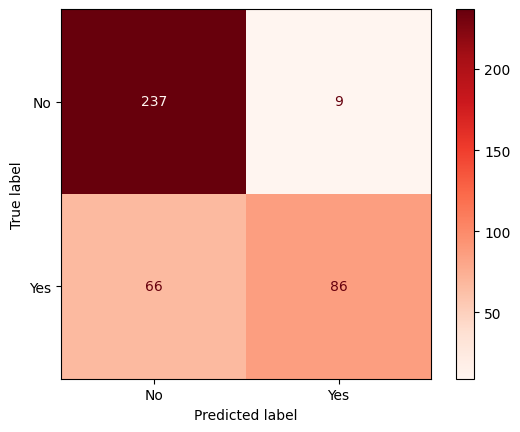

In [57]:
plot_confusion_matrix(knn_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# Three-Model Stacking Classifier

In [58]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

estimators = [("lr", model1), ("knn", model2), ("dt", model3)]
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [59]:
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [60]:
y_predict = stacking_clf.predict(X_test)

In [61]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       246
           1       0.92      0.54      0.68       152

    accuracy                           0.81       398
   macro avg       0.85      0.76      0.77       398
weighted avg       0.83      0.81      0.79       398



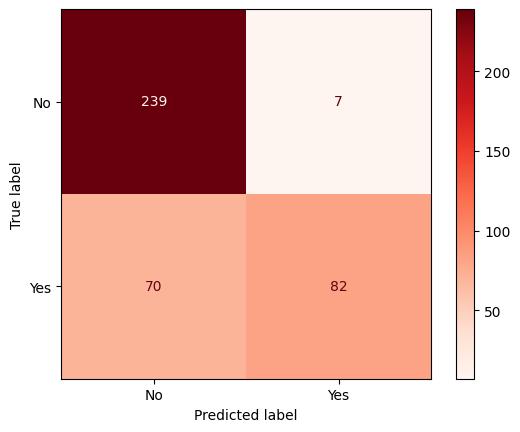

In [62]:
plot_confusion_matrix(stacking_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# Three-Model Soft Voting Classifier

In [64]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

soft_voting_clf = VotingClassifier(
    estimators=[("lr", model1), ("rf", model2), ("svc", model3)], voting="soft"
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', KNeighborsClassifier()),
                             ('svc', DecisionTreeClassifier())],
                 voting='soft')

In [65]:
y_predict = soft_voting_clf.predict(X_test)

In [66]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       246
           1       0.76      0.56      0.64       152

    accuracy                           0.76       398
   macro avg       0.76      0.72      0.73       398
weighted avg       0.76      0.76      0.75       398



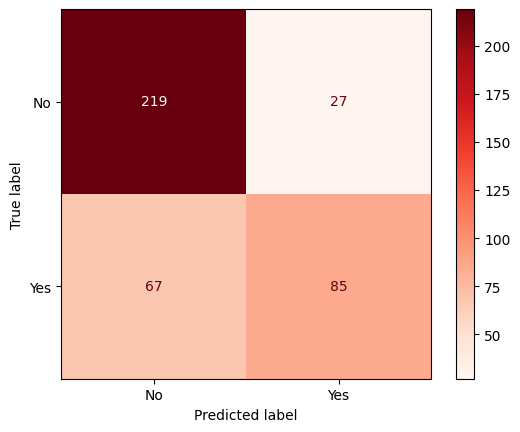

In [67]:
plot_confusion_matrix(soft_voting_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# Three-Model Hard Voting Classifier

In [68]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

hard_voting_clf = VotingClassifier(
    estimators=[("lr", model1), ("rf", model2), ("svc", model3)], voting="hard"
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', KNeighborsClassifier()),
                             ('svc', DecisionTreeClassifier())])

In [69]:
y_predict = hard_voting_clf.predict(X_test)

In [70]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       246
           1       0.93      0.52      0.67       152

    accuracy                           0.80       398
   macro avg       0.85      0.75      0.76       398
weighted avg       0.83      0.80      0.79       398



In [101]:
plot_confusion_matrix(hard_voting_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

NameError: name 'hard_voting_clf' is not defined